# From the Curriculum

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

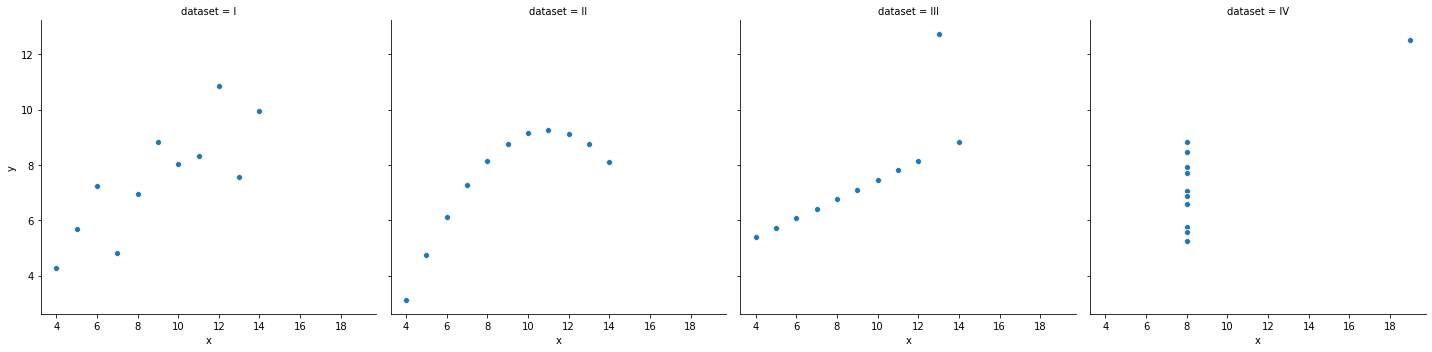

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

sns.relplot(x="x", y="y", col="dataset", data=df) # 'relplot' shows the relationship between two variables
                                                # ('x', and 'y') in mathematical subsets (labeled 'datasets I, II, III, IV')
                                                # using the info from 'df'
df.groupby("dataset").describe()

^^ **Above: 'datasets I & II' show no outliers, whereas 'III' and 'IV' do.**

### Remember here the 'Empirical Rule' / '68-95-99.7 Rule.'  In a NORMAL DISTRIBUTION...

- 68% of the observations fall w/in one standard deviation of the mean;

- 95% of the observations fall w/in two standard deviations of the mean; and 

- 99.7% of the observations fall w/in three standard deviations of the mean


### When it comes to dealing with outliers:

- don't just dismiss the ones that fall outside the 2 standard deviations.  There could be a lot of data to glean from teh remaining .3-5%!

## Using Z-Score To Identify Outliers

In [2]:
# Given some data

import numpy as np
import pandas as pd

x = np.random.normal(50, 40, size=1000) # center of random, normal distrib=50, width=40, number of observations=1000

# calculate the Z-Score

zscores = pd.Series((x - x.mean()) / x.std()) # this is a measure of the standard deviation

# finds all the observations two or more standard deviations from the mean:

x[zscores.abs() >= 2] # 'abs' is 'absolute value'

# finds all the observations three or more standard deviations from the mean:

x[zscores.abs() >= 3]

array([185.14318702, -90.36751067])

In [3]:
**^^ Breaks down as follows:**

SyntaxError: invalid syntax (<ipython-input-3-911f0f6275ba>, line 1)

## The Interquartile Range Rule

- works well against non-normally distributed data (skewed data, for example)

- 1.5 is the Range Rule for finding mild outliers, but Maggie suggests using 3 to preserve the original data as much as possible

- The multiplier is a hyperparameter

- To do it:
    
    1.) Break down data into quartiles;
    
    2.) Determine the Interquartile Range (IQR) with IQR = q3 - q1
    
    3.) Pick a multiplier like 1.5 or 3; 
    
    4.) Add 'multiplier * iqr' to q3 to get the UPPER BOUND; or
    
    5.) Subtract 'multiplier * iqr' from q1 to get the LOWER BOUND
    
    
Next, create a fence around the bounds to identify which outliers are the most extreme:
    
    1.) for the LOWER INNER FENCE: q1 - (1.5*IQR)
    
    2.) for the UPPER INNER FENCE: q3 + (1.5*IQR)
    
    3.) for the LOWER OUTER FENCE: q1 - (3*IQR)
        
    4.) for the UPPER OUTER FENCE: q3 + (3*IQR)

# Exercise

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy


In [6]:
data = pd.read_csv("lemonade.csv")

In [7]:
df = pd.DataFrame(data)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [8]:
df.shape

(365, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [27]:
# change 'Sales' from int to float

df["Sales"] = df["Sales"].astype(float)

# Using df['DataFrame Column'] = df['DataFrame Column'].astype(float) as reference


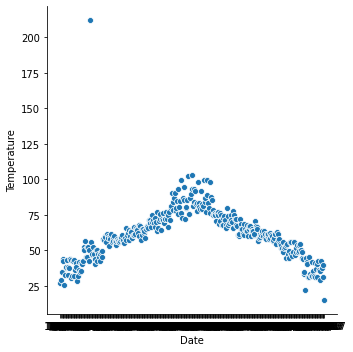

In [28]:
sns.relplot(x="Date", y="Temperature", data = df)
df.groupby("Sales")

**Function called 'get_lower_and_upper_bounds' that takes in a pandas Series and a multiplier (or IQR , like 1.5 or 3)  While 1.5 will find mild outliers, 3 is recommended because it finds the more extreme outliers while preserving most of our original data.  For this first part of the exercise, we will be using 1.5**

In [29]:
def get_lower_and_upper_bounds(x, IQR):
    """
    Function to take in two arguments: the first is a pandas Series, the other an IQR like 1.5 or 3
    """
    x = pd.Series({"Date": "Date", "Sales": "Sales"})
    lower_bound = x.Sales * .025
    upper_bound = x.Sales * .075
    IQR = Q3 - Q1
    x = x.loc[~((x["Sales"] < (Q1 - 1.5 * IQR)) | x["Sales"] > (Q3 + 1.5 * IQR)),]
    return x

# Using the following as reference:
# def outlier(data, col):
#    Q1 = data[col].quantile(0.25)
#    Q3 = data[col].quantile(0.75)
#    IQR = Q3 - Q1
#    data = data.loc[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))),]
#    return data

## Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [30]:
get_lower_and_upper_bounds(df, IQR=1.5)

TypeError: can't multiply sequence by non-int of type 'float'